## Predicting Survival in the Titanic Data Set

### Introduction About The Data:


In this project we will build a decision tree classification model to make predictions about the Titanic dataset where according to different features we can tell if a person has `survived or not` in titanic disaster. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not. The dataset has 12 columns including target variable.

Independent variables:

* `PassengerId` : This is the onboard passenger's Id Number
* `Pclass` : Passenger Class
* `Name` : Passenger Name
* `Sex` : Passenger Gender
* `Age` : Passenger Age
* `SibSp` : Number of Siblings/Spouses Aboard
* `Parch` : Number of Parents/Children Aboard
* `Ticket` : Ticket Number
* `Fare` : Passenger Fare (British pound)
* `Cabin` : Cabin Code
* `Embarked` : Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

Target variable:

* `Survived` : Person survived or not(0: has not survived, 1: has survived)

Dataset Source Link:
[https://catboost.ai/en/docs/concepts/python-reference_datasets_titanic](https://catboost.ai/en/docs/concepts/python-reference_datasets_titanic)


In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sb
from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

In [2]:
## Data Ingestions step
df = pd.read_csv('data/titanic-train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
## Check data shape
print("Shape:", df.shape)
print("Size:", df.size)

Shape: (891, 12)
Size: 10692


In [4]:
## Check null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
### Missing values present in the data

In [5]:
## Statistical Description of data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Here, PassengerId is just a numerical number and not related to survival prediction and  it does not contribute to a persons survival probability.
# Similarly, Name, Ticket, Cabin, and Embarked fields are non relevant to survival prediction

df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


In [8]:
## check for duplicated records
df.duplicated().sum()

114

In [9]:
# check null value %
print("Null Error Rate:", format(df['Survived'].mean()*100, '.2f'), '%')

Null Error Rate: 38.38 %


In [10]:
# Overall chance of survival for a Titanic passenger is low.

In [11]:
## segregate numerical and categorical columns
numerical_columns = df.columns[df.dtypes!='object']
categorical_columns = df.columns[df.dtypes=='object']

print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived'], dtype='object')
Categorical Columns: Index(['Sex'], dtype='object')


In [12]:
## Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def create_barplot(df, col_name=None, sns_color="coolwarm"):
    f_count = df[col_name].value_counts().sort_values(ascending=False).to_frame()
    f_count = f_count.rename(columns={col_name: 'count'})

    n = f_count.shape[0]
    nl = [i for i in range(n)]
    cplt = np.array(sns.color_palette(sns_color, n)).take(nl, axis=0)

    ax = sns.barplot(x=f_count.index, y='count', data=f_count, palette=cplt)

    for p in ax.patches:
        ax.annotate(
            format(p.get_height()),
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', xytext=(0,9),
            textcoords='offset points'
        )
    return

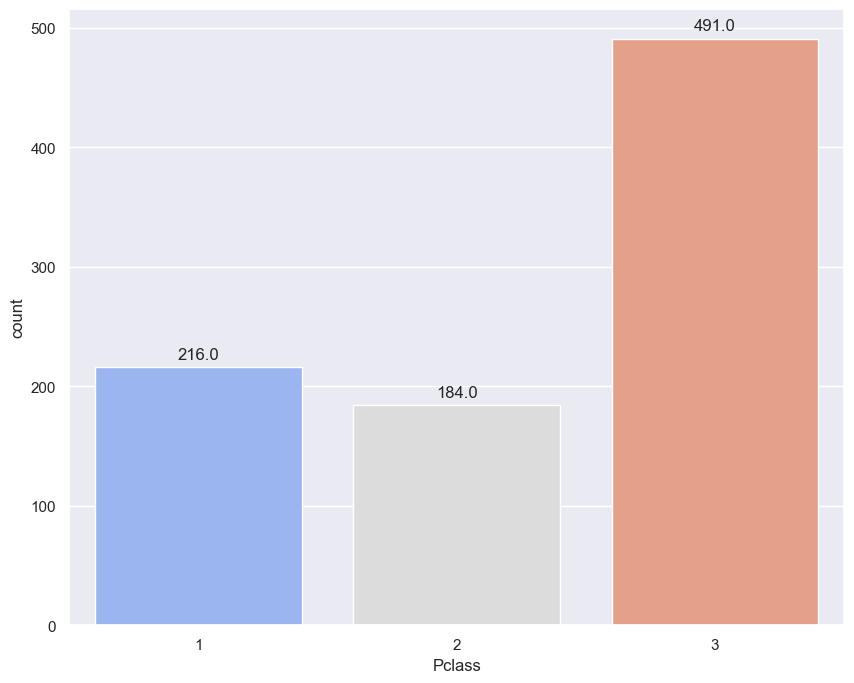

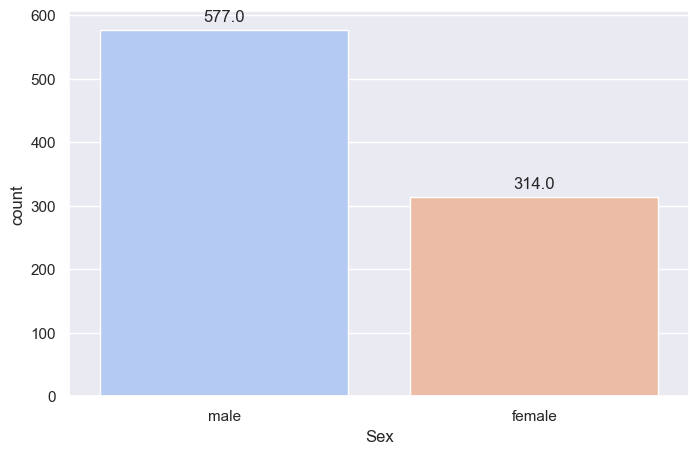

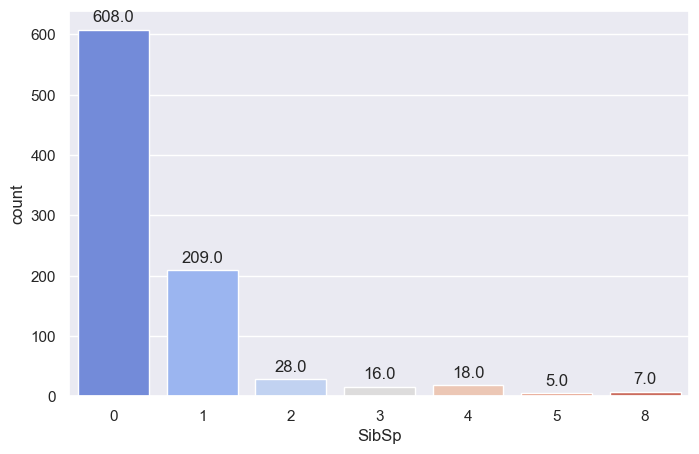

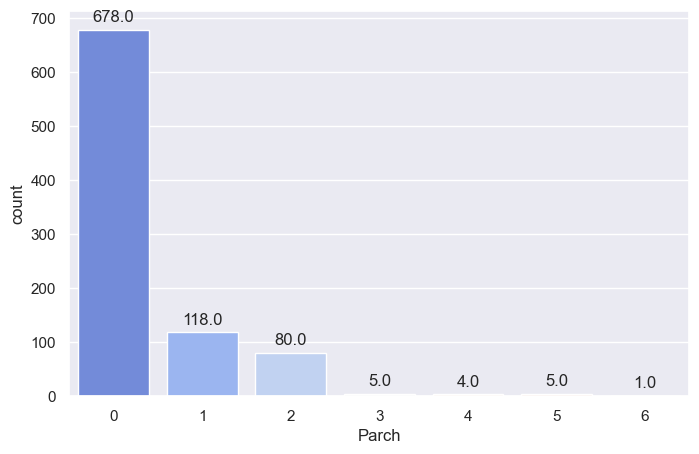

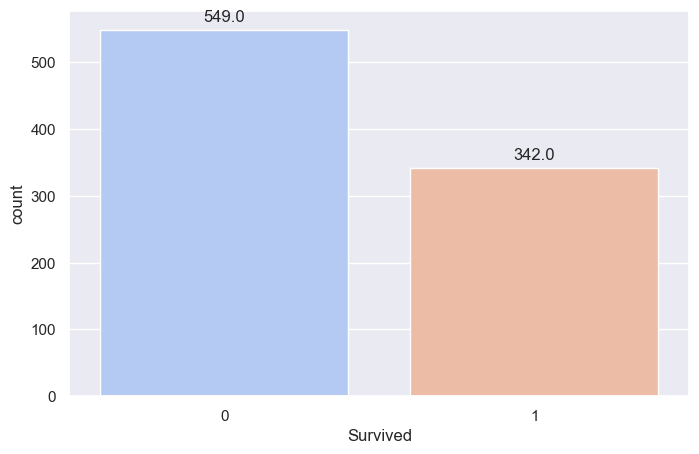

In [13]:
# visualize barplots for discrete variables
n_columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Survived']
for col in n_columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    plt.gca().set(xlabel=col, ylabel='count')
    create_barplot(df, col_name=col)

In [14]:
def plot_histogram(df, col_name=None):
    x_max = df[col_name].max()
    plt.figure(figsize=(7, 5))
    plt.xlim(0, x_max)
    plt.xlabel(col_name)
    plt.ylabel('Records')
    # sns.distplot(df[col_name], bins=int(x_max*0.05), kde=False)
    plt.hist(df[col_name], color="lightblue", ec="red")
    plt.show()
    return

<Figure size 800x500 with 0 Axes>

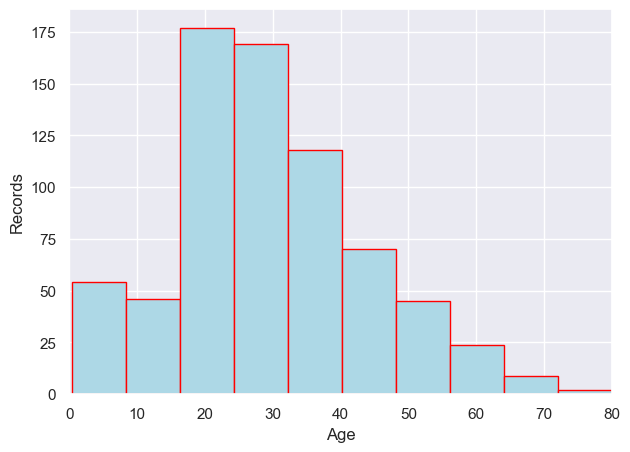

<Figure size 800x500 with 0 Axes>

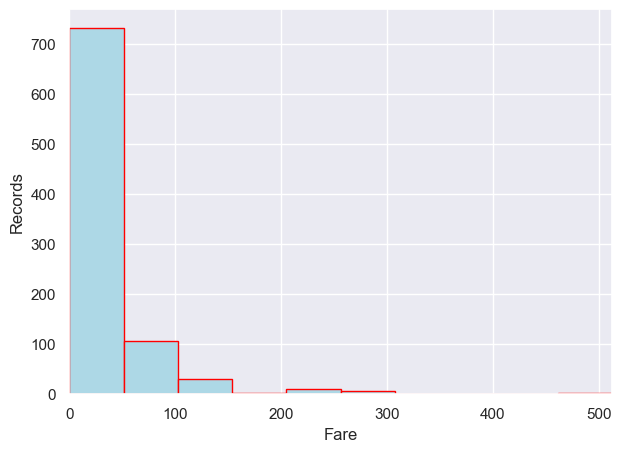

In [15]:
# visualize histogram for continuous variables
n_columns = ['Age', 'Fare']
for col in n_columns:
    plt.figure()
    plt.tight_layout()
    plot_histogram(df, col_name=col)

In [16]:
def create_countplot(df, x_col=None, y_col="Survived", txt_msg=None):
    plt.figure(figsize=(8,6))
    sns.set_style("darkgrid")
    sns.countplot(data=df, x=x_col, hue=y_col)
    plt.title(txt_msg)
    plt.show()
    return

<Figure size 800x500 with 0 Axes>

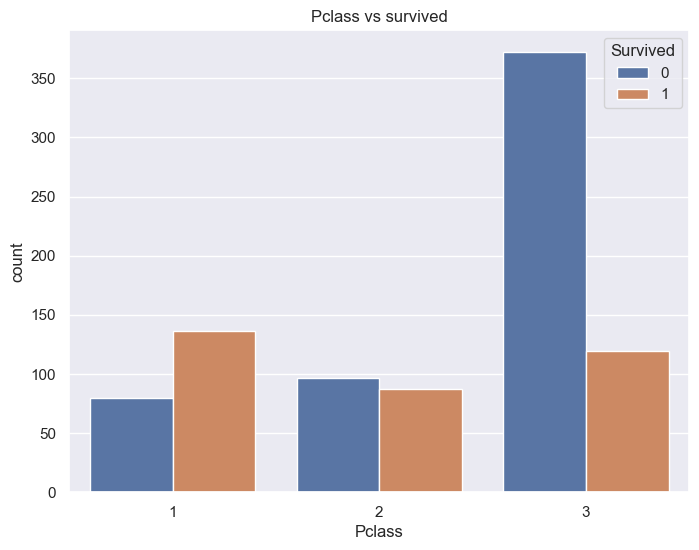

<Figure size 800x500 with 0 Axes>

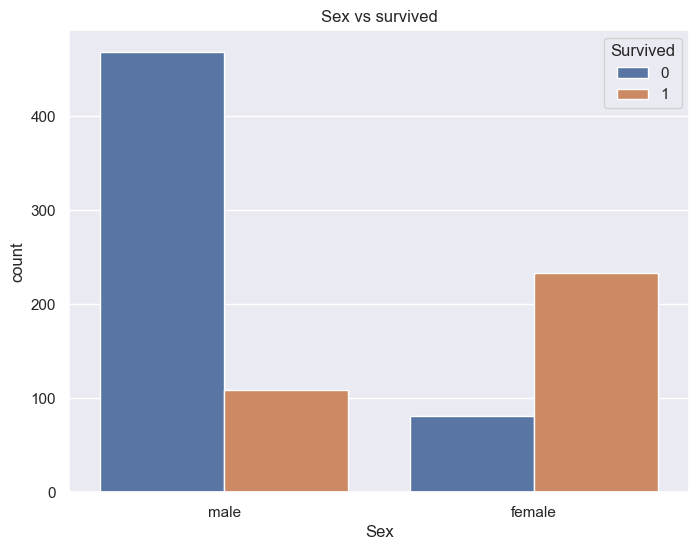

<Figure size 800x500 with 0 Axes>

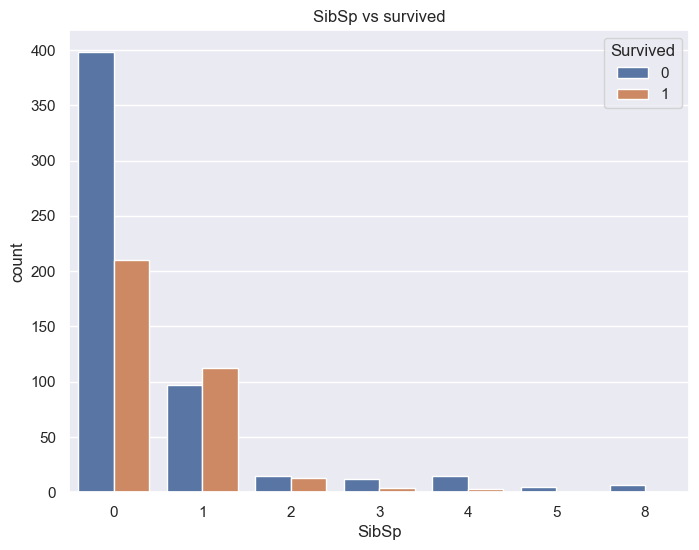

<Figure size 800x500 with 0 Axes>

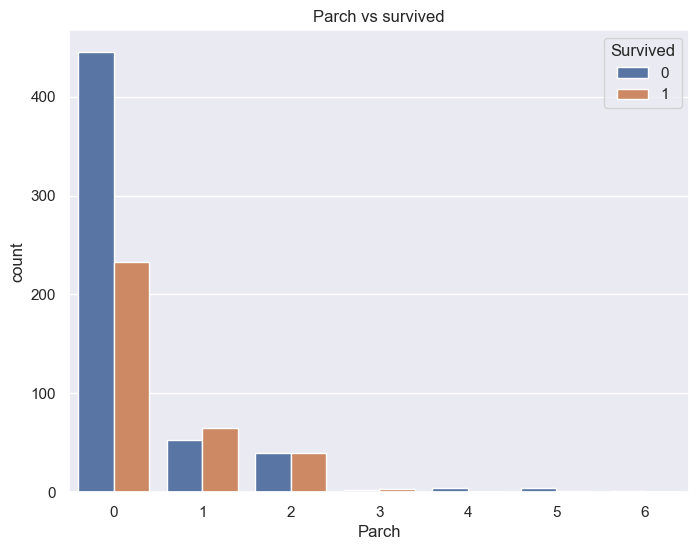

In [17]:
n_columns = ['Pclass', 'Sex', 'SibSp', 'Parch']
for col in n_columns:
    plt.figure()
    plt.tight_layout()
    create_countplot(df, x_col=col, txt_msg=col+' vs survived')

In [20]:
def compare_histogram(df, x_col=None, y_col="Survived"):
    x_max = df[x_col].max()
    n_bin = int(x_max*0.05)
    sns.FacetGrid(df, col=y_col).map(plt.hist, x_col, bins=n_bin)
    plt.show()
    return

<Figure size 800x500 with 0 Axes>

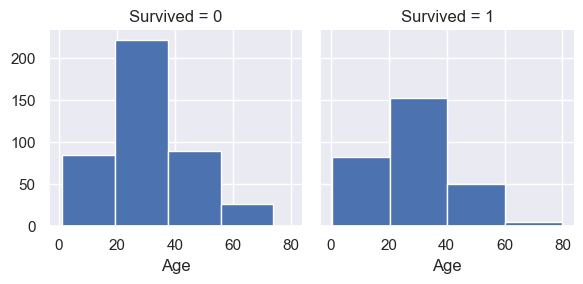

<Figure size 800x500 with 0 Axes>

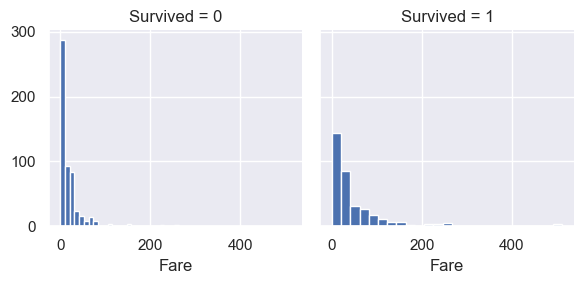

In [21]:
n_columns = ['Age', 'Fare']
for col in n_columns:
    plt.figure()
    plt.tight_layout()
    compare_histogram(df, x_col=col)

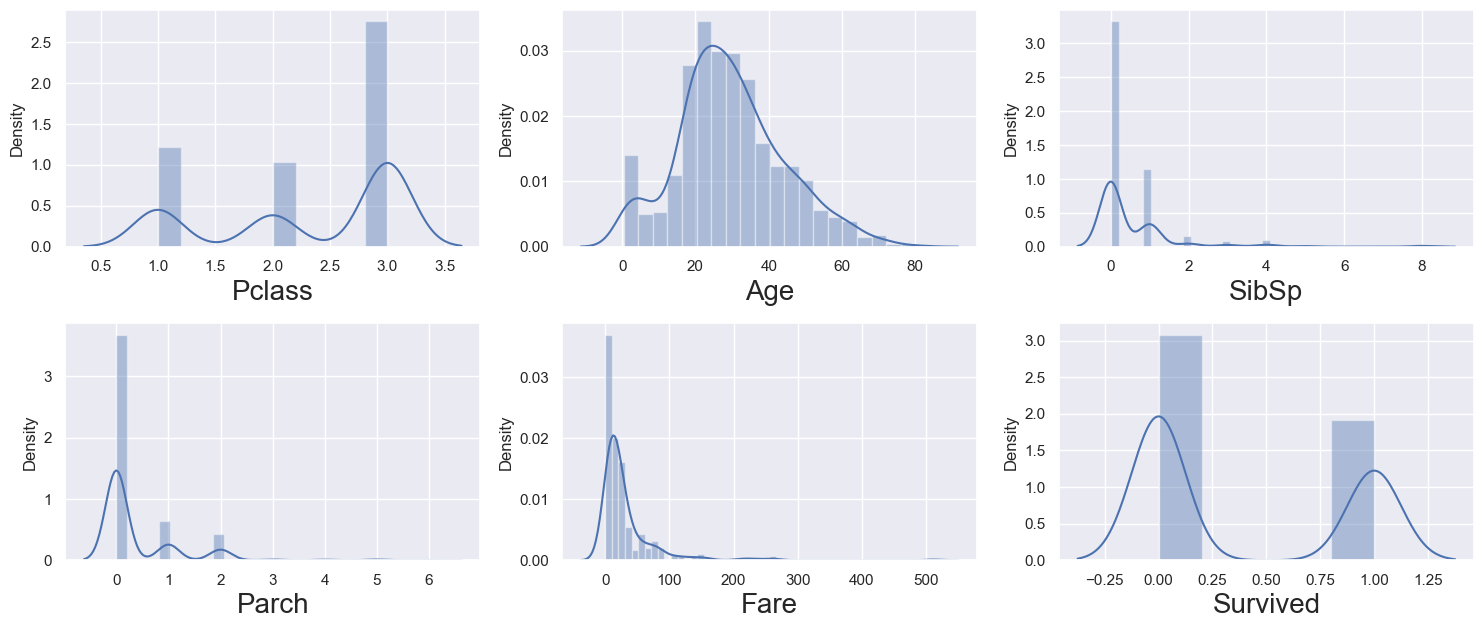

In [22]:
# checking the data - normalized or not
plt.figure(figsize=(15, 9))
pltnumber = 1
for column in df.columns.tolist():
    if df[column].dtype != object:
        ax=plt.subplot(3, 3, pltnumber)
        sns.distplot(df[column], ax=ax)
        plt.xlabel(column, fontsize=20)
        pltnumber+=1
plt.tight_layout()

In [23]:
# changing sex column to binary
cat2num = {'male': 0, 'female': 1}
df['Sex2'] = df['Sex'].map(cat2num)
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Sex2
0,3,male,22.0,1,0,7.2500,0,0
1,1,female,38.0,1,0,71.2833,1,1
2,3,female,26.0,0,0,7.9250,1,1
3,1,female,35.0,1,0,53.1000,1,1
4,3,male,35.0,0,0,8.0500,0,0


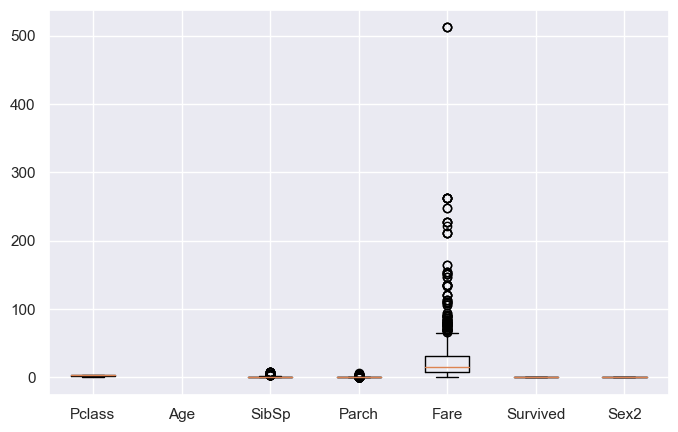

In [26]:
# outlier checking
cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived', 'Sex2']
plt.boxplot([df[col] for col in cols], labels=cols)
plt.show()


In [27]:
# replace outliers from Fare data
df.loc[df['Fare'] >= 100, 'Fare'] = 100
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Sex2
0,3,male,22.0,1,0,7.2500,0,0
1,1,female,38.0,1,0,71.2833,1,1
2,3,female,26.0,0,0,7.9250,1,1
3,1,female,35.0,1,0,53.1000,1,1
4,3,male,35.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,0,0
887,1,female,19.0,0,0,30.0000,1,1
888,3,female,NaN,1,2,23.4500,0,1
889,1,male,26.0,0,0,30.0000,1,0


In [28]:
import pylab

def plot_skewness(data, feature):
    skewness = round(data[col].skew(), 2)
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.4, top=0.85)
    fig.suptitle(f'Skewness of {feature}: {skewness}', fontsize=15)
    # add plot
    ax1 = fig.add_subplot(2,2,1)
    data[feature].hist()
    ax2 = fig.add_subplot(2,2,2)
    stats.probplot(data[feature], dist='norm', plot=pylab)
    # add sub-title
    ax1.title.set_text(feature)
    ax2.title.set_text('probability')
    plt.show()


In [30]:
from scipy import stats

# transform Fare data
df['Fare_t1'] = np.log1p(df['Fare'])
df['Fare_t2'] = 1/(df['Fare']-1)
df['Fare_t3'] = np.sqrt(df['Fare'])
df['Fare_t4'] = (df['Fare']**(2/9))
df['Fare_t5'], parameter = stats.boxcox(df['Fare']+0.5)


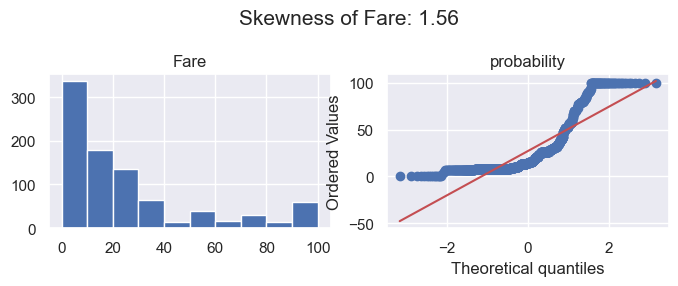

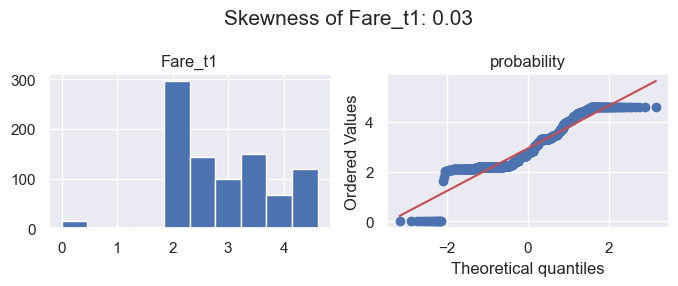

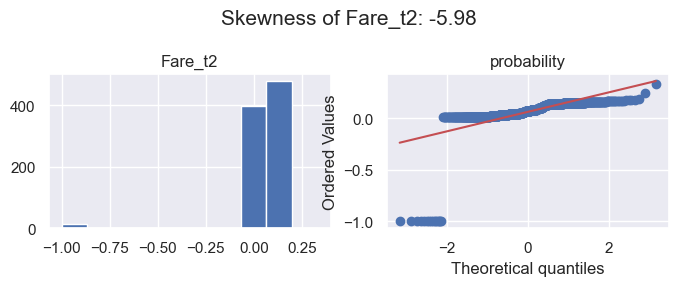

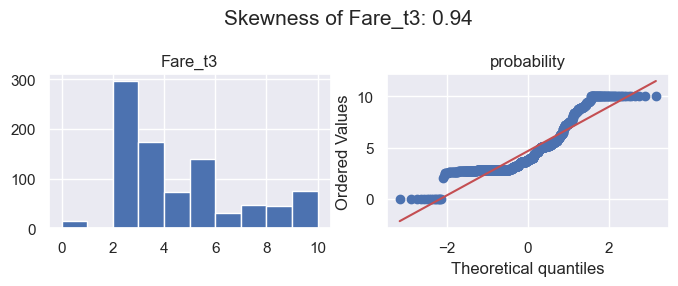

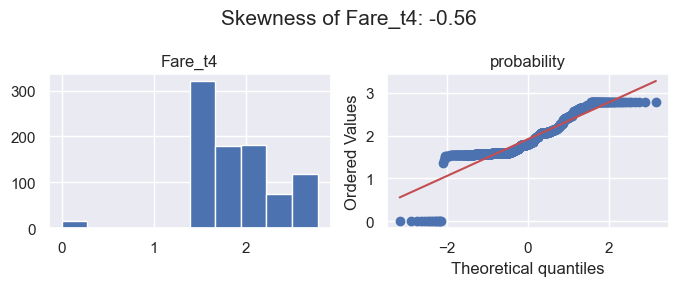

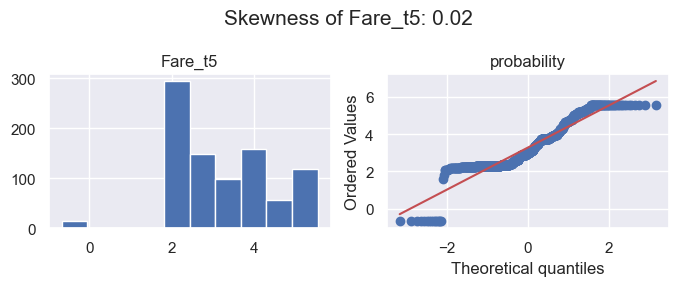

In [31]:
fare_cols = ['Fare', 'Fare_t1', 'Fare_t2', 'Fare_t3', 'Fare_t4', 'Fare_t5']

for col in fare_cols:
    plot_skewness(df, col)

In [35]:
# dropping all fare columns except fare_t5 as this is normally distributed and skewness close to zero (The skewness for a normal distribution is zero, 
# and any symmetric data should have a skewness near zero.)
tdf = df.drop(['Fare', 'Fare_t1', 'Fare_t2', 'Fare_t3', 'Fare_t4', 'Sex'], axis=1)
tdf = tdf[['Pclass', 'Sex2', 'Age', 'SibSp', 'Parch', 'Fare_t5', 'Survived']]
tdf

,Pclass,Sex2,Age,SibSp,Parch,Fare_t5,Survived
0,3,0,22.0,1,0,2.218672,0
1,1,1,38.0,1,0,5.064247,1
2,3,1,26.0,0,0,2.316823,1
3,1,1,35.0,1,0,4.662339,1
4,3,0,35.0,0,0,2.334198,0
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,2.883012,0
887,1,1,19.0,0,0,3.911773,1
888,3,1,NaN,1,2,3.599829,0
889,1,0,26.0,0,0,3.911773,1


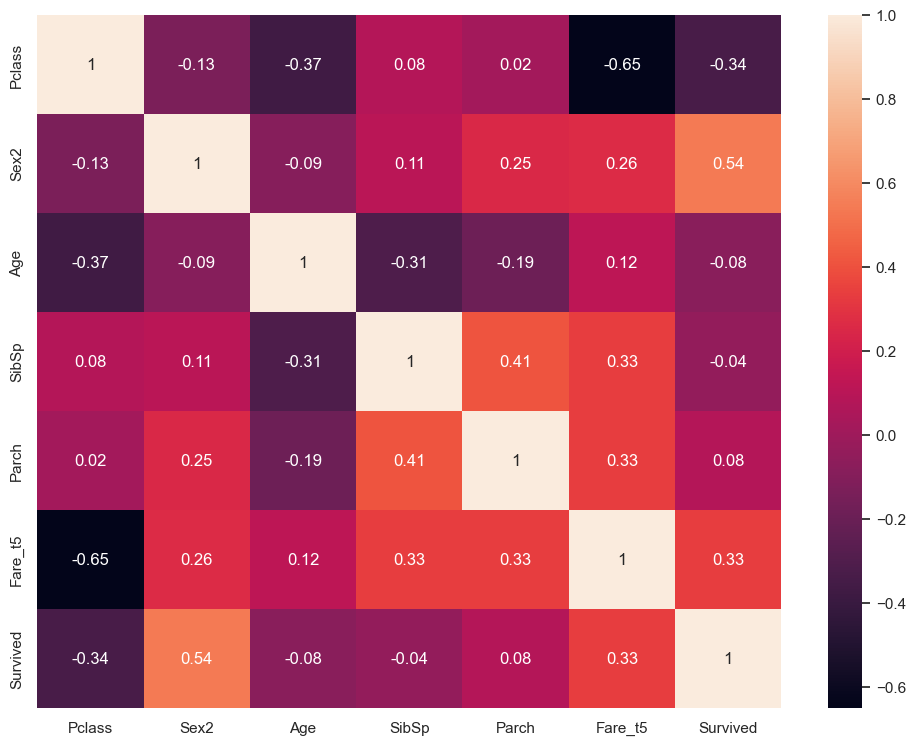

In [36]:
## correlation test
correlation_matrix = tdf.corr().round(2)
sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
# no collinearity observed in the above features 